# I. Introduction

## Why should I use Principal Component Analysis?
PCA can be used for a variety of purposes for example:
* To easily __visualize__ your high-dimensional data in 2 or 3 dimensions
* To assay the __relatedness__ between biological samples collected from different experiments
* To __distinguish batch effects__ and real biological effects in your experiments
* Sometimes, to __cluster__ observations belonging to different groups (use with caution).
* Sometimes, to __denoise__ your data by removing extremely noisy features that have less information content.

<font color="crimson"> <b> <i>EXERCISE : </i></b>Think of a scenario in your own research where PCA might be helpful, and type it in the chat
</font> 

## What does Principal Component Analysis do?

* PCA is dimension reduction tool i.e. if your data has many features, PCA is a principled method to reduce the number of features __while preserving the information content__.
* Information is preserved by understanding the correlation and covariance between the different features and __removing redudant information__. For example, if features $f_1$ and $f_2$ are 100% correlated then the entire dataset can be represented by the information in feature $f_1$ or $f_2$ alone.
* Fundamentally, PCA is a __projection__ of the original data into a new, reduced feature-space.

<font color="crimson"> <b> <i>EXERCISE : </i></b>What does "projection" mean? Type in the chat - what is the projected value of $\vec{A}$ on $\vec{B}$ ?
</font>

In [2]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/ABy-pimA4wU?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

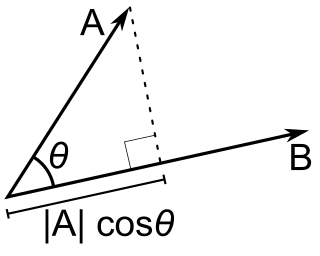

# II. How does PCA work?

PCA aims to find new axes for the data, such that __variance is  maximized__ along the axes. <br>
This is mathematically equivalent to __minimizing the distance__ of all the points from the new axes.<br>

![pcagifurl](https://i.stack.imgur.com/lNHqt.gif)

Once, this axis is found, it __projects__ the original axes onto the new axis.<br>
After the first principal component axis, PC1, is found, the next principal component axis, PC2, is created __orthogonal__ (i.e. correlation = 0) to PC1, such that PC2 now is the axis with the second-highest variance along it.

# <font color="#900C3F">Google Colab users only</font> 
Run the following commands to import datasets into your Google Colab environment

In [ ]:
!wget https://raw.githubusercontent.com/ritika-giri/pca-for-biologists-workshop/main/plant_data.csv

# III. Let's try an intuitive example
We are plant biologists. We have some plant-feature measurements for different species. <br>We want to  easily __visualize__ our data in 2D to see which 2 species are most __similar__ to each other.

In [1]:
# First, let's set up our enviroment
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

# figure settings
sns.set_context('notebook', font_scale=1.2)

In [2]:
# Import the dataset
plant_data = pd.read_csv('plant_data.csv', index_col=None)

<font color="crimson"> <b> <i>EXERCISE : 
    </i></b> <ul>
    <li>Explore your dataset, how many plant-features are there?</li>
    <li>How many observations? </li>
    <li>How many different species are present?</li>
    </ul>
</font> 

In [4]:
# how many plant-features are there?


In [13]:
# how many observations are in your dataset?


In [14]:
# how many unique species (target column) are present in this data?


## * What is the structure of the data?
Remember PCA relies on the __covariance__ or __correlation__ between features, and reduces features by removing redudant information.

In [17]:
# Correlation between features.
plant_data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<font color="crimson"> <b> <i>EXERCISE :  </i></b>
    Type in the chat - which 2 features show the highest correlation?
</font> 

## * Let's perform PCA!

### I. Import the PCA class object from sklearn

In [18]:
from sklearn.decomposition import PCA

### II. Initialize PCA object with desired dimensions
Remember, the desired dimensions can only be equal to or less than the original dimensions.

In [20]:
pca = PCA(n_components=2)

Here, `pca` is the object you are creating and initializing, while `PCA` is the empty/base object class imported from sklearn.<br>
Always read the documentation - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

### III. Project the data into PCA space

Note, you are not using the "target" values in the data, only the feature measurements to construct the PCA projection.

In [25]:
# select the data to be used for PCA
data = plant_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]

In [26]:
# perform PCA projection
projected_data = pca.fit_transform(data)

In [27]:
# create a dataframe for ease of data manipulation
projected_df = pd.DataFrame(data = projected_data, 
                            columns=['PC1', 'PC2']) # these are the principal component axes
projected_df.head()

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


These values look nothing like what we started with!!!<br>
How am I supposed to __interpret__ the projected dataset? <br>
What are the units of these new axes??

## * Making sense of the results

_Let's go back to our research question:_ <br> We want to  easily __visualize__ our data in 2D to see which 2 species are most __similar__ to each other.

### I. Visualizing the PCA space

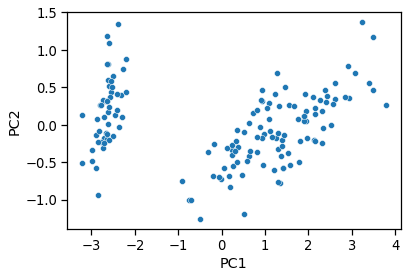

In [28]:
# Plot the data like you would a regular dataframe
plt.figure()
sns.scatterplot(data=projected_df, x='PC1', y='PC2')
plt.show()

Columns 'PC1' and 'PC2' can be thought of as new features of the dataset that you have extracted. Each PC is essentially a __linear combination__ of the original features.

For example, if we have features $f_1$ and $f_2$ in a dataset, and decide to create a new composite feature $F = 2f_1 - 5f_2$, then feature $F$ can be said to be a linear combination of the original features $f_1$ and $f_2$.

### II. Detecting similar samples

Since `PC1` and `PC2` are linear combinations of original features, the units of `PC1` and `PC2` are also linear combinations of the original feature units. However, saying "3 kgs and kms" makes no sense, therefore we call the units arbitrary, represented as (a.u.) in scientific graphs.

Even though the units are arbitrary, __points that are closer together in PCA space are more related to each other__. This is because, if they were close together in the original data space, the PCA transformation treats every point identically (linearly), and therefore they will still be closer together in the projected PCA space.

<font color="crimson"> <b> <i>EXERCISE :  </i></b>
    Plot the data above, but now color coded for different species. <br>Based on the plot, type in the chat - which 2 species are most similar to each other?
</font> 

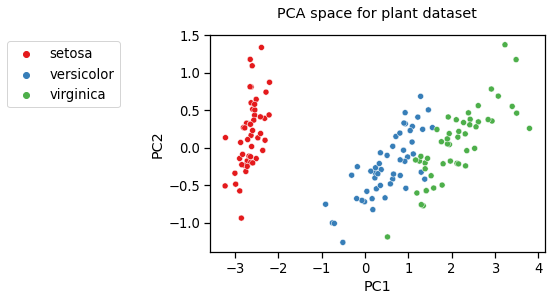

In [57]:
# Let's add labels to each of the datapoints according to the species it belongs to
# fill in the hue variable with the target column from plant_data
plt.figure()
sns.scatterplot(data=projected_df, x='PC1', y='PC2', 
                palette='Set1', hue = .....)  # hint: replace ..... with plant_data['target']
plt.legend(bbox_to_anchor=(-0.25,1)) # reposition the legend
plt.title('PCA space for plant dataset', y =1.05)
plt.show()

Distance in this PCA space can be understood just like you would understand distance in any linear 2D graph.

In [100]:
# Re-plot the data to make the axes units equal relative to each other
# copy the plot code above and add -- plt.axis('equal') before plt.show()



### III. Interpreting the components

So we got some fancy new features, but how can we understand them? <br>For example, what does PC1 represent? How is it different from PC2?

The `pca` object we initialized and fit stores a lot of important information. <br>
Again, documentation is key - read the attributes section in the documentation <br>- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

As explained before, each PC is a __linear combination__ of the original features. 
$$ PC1 = c_{11}.f_1 + c_{12}.f_2 + c_{13}.f_3 + c_{14}.f_4 $$
$$ PC2 = c_{21}.f_1 + c_{22}.f_2 + c_{23}.f_3 + c_{24}.f_4 $$

The attribute `pca.components_` stores the linear coefficient values $c_n$ for each original feature for each PC. <br>
The attribute `pca.feature_names_in_` stores the names of the original features. 

<font color="crimson"> <b> <i>EXERCISE :  </i></b>
    Print the values of the coefficients, and the names of the original data features used for PCA.
</font> 

In [49]:
# print the values of the coefficients


In [50]:
# print the names of the original features


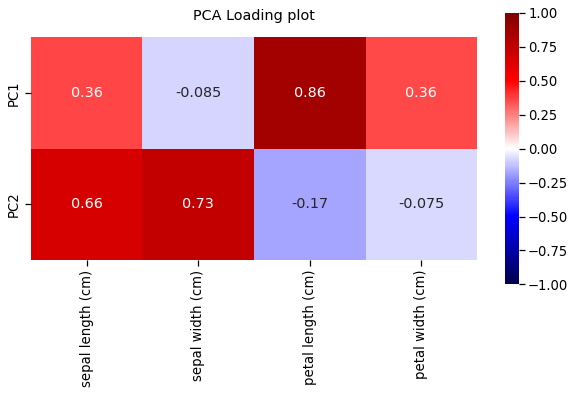

In [52]:
# Let's visualize the coefficients and features together - 
plt.figure(figsize=(10,5))
sns.heatmap(pca.components_, 
            square=True, annot=True,             # add coefficient values in plot with annot
            xticklabels=pca.feature_names_in_,   # label original feature names
            yticklabels=['PC1', 'PC2'],          # PC number
            cmap='seismic',                      # colorscale
            vmin=-1, vmax=1)                     # min,max values of colorscale
plt.title('PCA Loading plot', y=1.05)
plt.show()

From the above plot we understand :  
$$ PC1 = 0.36 f_1 - 0.085 f_2 + 0.86 f_3 + 0.36 f_4 $$
$$ PC2 = 0.65 f_1 + 0.73 f_2 - 0.17 f_3 - 0.075 f_4 $$
<font size=2>** Not exactly, PC coordinates are mean-centered, meaning that a constant value (equal to the mean) will be subtracted from all datapoints. However, for simplicity of understanding, we can assume the mean is 0.</font>

<font color="crimson"> <b> <i>EXERCISE :  </i></b>
    Type in the chat, which feature has the biggest contribution to PC2
</font> 

<font color="crimson"> <b> <i>EXERCISE :  </i></b>
    If $f_1$ has a coefficient value 0.4, and $f_2$ has a coefficient value -0.6 for a given PC, which feature has a higher impact on that PC? <br>
    Remember, the original features are being projected onto the PCs.
</font> 

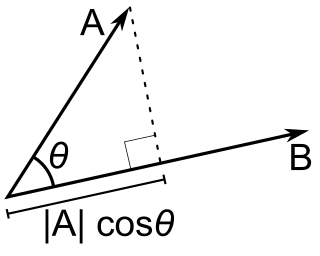

<font color="crimson"> <b> <i>EXERCISE :  </i></b>
     I run PCA twice on my dataset and get the following results for PC1:
$$ PC1 = 0.36 f_1 - 0.085 f_2 + 0.86 f_3 + 0.36 f_4 $$
$$ PC1 = -0.36 f_1 + 0.085 f_2 - 0.86 f_3 - 0.36 f_4 $$
Are these two results the same? What is the difference?
</font>

### IV. Diagnosing a "good" PCA result

So far, we understood what the PC components mean. But how do we assess if the information in the original data has been  faithfully reatined in the new PCA space?

<font color="crimson"> <b> <i>EXERCISE :  </i></b>
    Type in the chat, how you might assess if a linear regression model is doing a good job of predicting the outcome `y` from the set of input features `X`
</font> 

Just like $R^2$ provides a metric for assessing linear models, the attribute `pca.explained_variance_ratio_` provides a metric for how much information is retained in each PC.<br>
Adding up the explained variance for each component provides a reasonable idea of the total information retained by the pca model.

In [83]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


In [82]:
print(sum(pca.explained_variance_ratio_))

0.977685206318795


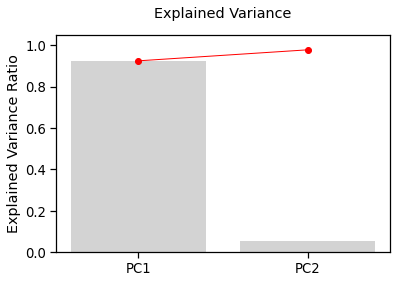

In [90]:
# barplot of the explained variance ratios
plt.figure()
plt.bar(x = projected_df.columns, 
        height = pca.explained_variance_ratio_,
       color = 'lightgrey')
plt.plot(projected_df.columns, np.cumsum(pca.explained_variance_ratio_), 'r-o', linewidth=1)
plt.ylim([0,1.05])
plt.ylabel('Explained Variance Ratio');
plt.title('Explained Variance', y=1.05)
plt.show()

* The first principal component is the linear combination of original features that accounts for the greatest possible variance.
* Each subsequent principal component is the linear combination of the original features that has the greatest possible variance _and_ is uncorrelated with the previously defined component.
* PC axes are uncorrelated with each other - this is by design to minimize redundancy between PCs.

<font color="crimson"> <b> <i>EXERCISE :  </i></b>
    Compare the correlation matrix of the original dataframe and the projected dataframe using the `df.corr()` function
</font> 

In [ ]:
# original plant data correlation matrix


In [ ]:
# projected data correlation matrix
